# 1-6 파이 차트(pie chart)
* 원을 파이 조각처럼 나누어서 표현
* 조각의 크기 : 해당 변수에 속하는 데이터 값의 크기에 비례
* plot() 메소드에 kind = 'pie' 옴션 사용

In [15]:
# 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
# read_csv() 함수로 df 생성
df = pd.read_csv('./auto-mpg.csv', header=None)

In [17]:
# 스타일 서식 지정
plt.style.use('default')

In [18]:
# 열 이름 지정
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name']
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [22]:
# 데이터 개수를 세기 위해 숫자 1을 원소로 갖는 'count' 열 생성
df['count'] = 1
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name,count
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino,1


In [20]:
# groupby() 메소드를 사용하여 데이터프레임 df의 모든 데이터를
# 'origin' 열 값인 1-USA, 2-EU, 3-JPN을 기준으로 3개의 그룹으로 나눈다.
# sum() 메소드로 각 그룹별 함계를 집계하여 df_origin 변수에 저장한다.
df_origin = df.groupby('origin').sum()   # origin 열을 기준으로 그룹화, 합계 연산
df_origin.head()

,mpg,cylinders,displacement,weight,acceleration,model year,count
origin,,,,,,,
1,5000.8,1556,61229.5,837121.0,3743.4,18827,249
2,1952.4,291,7640.0,169631.0,1175.1,5307,70
3,2405.6,324,8114.0,175477.0,1277.6,6118,79


In [24]:
# 제조국가(origin) 값을 실제 지역명으로 변경
df_origin.index = ['USA', 'EU', 'JAPAN']
df_origin.head()

,mpg,cylinders,displacement,weight,acceleration,model year,count
USA,5000.8,1556,61229.5,837121.0,3743.4,18827,249
EU,1952.4,291,7640.0,169631.0,1175.1,5307,70
JAPAN,2405.6,324,8114.0,175477.0,1277.6,6118,79


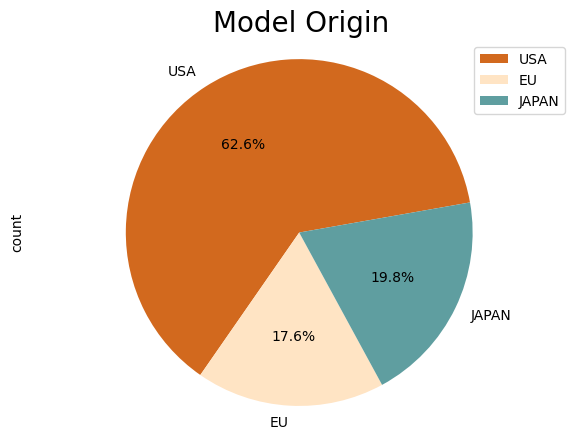

In [26]:
# 제조국가(origin) 열에 대한 파이 차트 그리기 – count 열 데이터 사용
# 국가별 점유율 의미하는 파이 차트
# autopct='%1.1f%%' 옵션은 숫자를 퍼센트로 나타내는데, 소수점 이하 첫째자리까지 표기한다는 의미
df_origin['count'].plot(kind='pie', 
                     figsize=(7, 5),
                     autopct='%1.1f%%',   # 퍼센트 % 표시
                     startangle=10,       # 파이 조각을 나누는 시작점(각도 표시)
                     colors=['chocolate', 'bisque', 'cadetblue']    # 색상 리스트
                     )

plt.title('Model Origin', size=20)
plt.axis('equal')    # 파이 차트의 비율을 같게 (원에 가깝게) 조정
plt.legend(labels=df_origin.index, loc='upper right')   # 범례 표시
plt.show()